In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

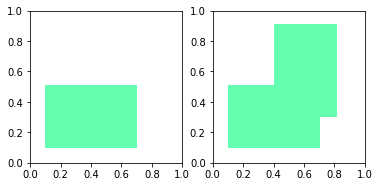

In [6]:
rect0 = Rectangle(0.1, 0.7, 0.1, 0.5)
rect1 = Rectangle(0.4, 0.8, 0.3, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.685597 [    0/10000]
loss: 0.557061 [ 6400/10000]
Test Error: 
 Accuracy: 71.7%, 52.8%
 Avg loss: 0.009229 

Epoch 2
-------------------------------
loss: 0.565761 [    0/10000]
loss: 0.536921 [ 6400/10000]
Test Error: 
 Accuracy: 70.2%, 58.3%
 Avg loss: 0.008982 

Epoch 3
-------------------------------
loss: 0.544526 [    0/10000]
loss: 0.529391 [ 6400/10000]
Test Error: 
 Accuracy: 70.7%, 59.3%
 Avg loss: 0.008824 

Epoch 4
-------------------------------
loss: 0.531627 [    0/10000]
loss: 0.523718 [ 6400/10000]
Test Error: 
 Accuracy: 72.3%, 59.9%
 Avg loss: 0.008680 

Epoch 5
-------------------------------
loss: 0.519860 [    0/10000]
loss: 0.519988 [ 6400/10000]
Test Error: 
 Accuracy: 72.8%, 60.9%
 Avg loss: 0.008545 

Epoch 6
-------------------------------
loss: 0.508654 [    0/10000]
loss: 0.517029 [ 6400/10000]
Test Error: 
 Accuracy: 74.4%, 61.7%
 Avg loss: 0.008357 

Epoch 7
-------------------------------
loss: 0.492043 [  

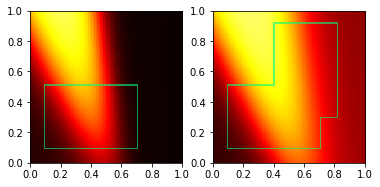

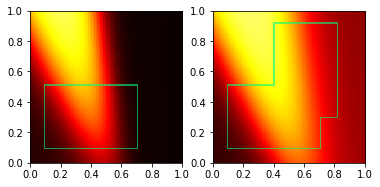

In [8]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(10)
experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.344312 [    0/10000]
loss: 0.452621 [ 6400/10000]
Test Error: 
 Accuracy: 85.1%, 74.0%
 Avg loss: 0.006800 

Epoch 2
-------------------------------
loss: 0.340441 [    0/10000]
loss: 0.451255 [ 6400/10000]
Test Error: 
 Accuracy: 85.6%, 73.8%
 Avg loss: 0.006768 

Epoch 3
-------------------------------
loss: 0.333610 [    0/10000]
loss: 0.450667 [ 6400/10000]
Test Error: 
 Accuracy: 85.6%, 73.8%
 Avg loss: 0.006742 

Epoch 4
-------------------------------
loss: 0.329211 [    0/10000]
loss: 0.450334 [ 6400/10000]
Test Error: 
 Accuracy: 85.5%, 73.7%
 Avg loss: 0.006715 

Epoch 5
-------------------------------
loss: 0.325459 [    0/10000]
loss: 0.449845 [ 6400/10000]
Test Error: 
 Accuracy: 85.7%, 73.5%
 Avg loss: 0.006684 

Epoch 6
-------------------------------
loss: 0.321309 [    0/10000]
loss: 0.449061 [ 6400/10000]
Test Error: 
 Accuracy: 85.4%, 73.7%
 Avg loss: 0.006654 

Epoch 7
-------------------------------
loss: 0.317092 [  

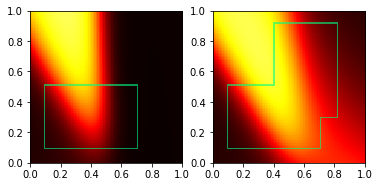

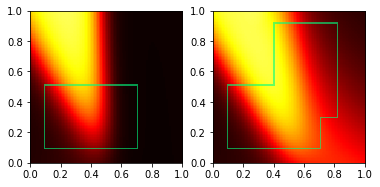

In [9]:
experiment = Experiment('rectangles-rev', model1, shapes, constraints1)
experiment.run(10)
experiment.save(dir='./models/')